# Análise de Evasão de Clientes - TelecomX

Este projeto tem como objetivo explorar o comportamento de evasão de clientes em uma empresa de telecomunicações. Através da análise de variáveis demográficas, contratuais, financeiras e de serviços, buscamos identificar padrões e insights que ajudem a reduzir o churn.


# Extração


In [147]:
# Importação da biblioteca para manipulação de dados
import pandas as pd

In [148]:
# Atribuição da variável url com link da base de dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
# Visualização da base de dados
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## Transformação

In [149]:
# Normalizando as colunas aninhadas do DataFrame original
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

In [150]:
# Concatenando todas as colunas normalizadas junto com 'customerID' e 'Churn'
df_normalizado = pd.concat([
    df[['customerID', 'Churn']].reset_index(drop=True),
    customer_df.reset_index(drop=True),
    phone_df.reset_index(drop=True),
    internet_df.reset_index(drop=True),
    account_df.reset_index(drop=True)
], axis=1)

In [151]:
# Visualiza a base de dados normalizada
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [152]:
#Confere a estrutura da base de dados
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [153]:
# Conferir valores ausentes
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [154]:
# Verificando campos vazios representados como strings vazias ''
df_normalizado.apply(lambda x: (x == '').sum())

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [155]:
# Verificando distribuição da variável alvo (Churn), incluindo valores ausentes
df_normalizado['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [156]:
# Removendo registros com valores inválidos ou ausentes em 'Churn'
df_normalizado = df_normalizado[df_normalizado['Churn'].isin(['Yes', 'No'])]


In [157]:
# Verificando novamente a distribuição após limpeza
df_normalizado['Churn'].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869


In [158]:
# Conferir duplicados
df_normalizado.duplicated().sum()

np.int64(0)

In [159]:
# Converter para float
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

<ipython-input-159-87f2b8aa2660>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')


In [160]:
# Verificar se restaram valores nulos
df_normalizado['Charges.Total'].isna().sum()

np.int64(11)

In [161]:
# Visualização de valores únicos em colunas categóricas (object)
for col in df_normalizado.select_dtypes(include='object').columns:
    print(f"Coluna: {col}")
    print(df_normalizado[col].value_counts())
    print('-'*40)

Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64
----------------------------------------
Coluna: Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64
----------------------------------------
Coluna: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Coluna: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Coluna: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
Coluna: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
Coluna: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count

In [162]:
# Substituir 'No phone service' por 'No' em colunas relacionadas ao serviço de telefone
phone_cols = ['MultipleLines']
df_normalizado[phone_cols] = df_normalizado[phone_cols].replace({'No phone service': 'No'})

# Substituir 'No internet service' por 'No' nas colunas relacionadas ao serviço de internet
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_normalizado[internet_cols] = df_normalizado[internet_cols].replace({'No internet service': 'No'})


<ipython-input-162-c5f0c1bd9868>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado[phone_cols] = df_normalizado[phone_cols].replace({'No phone service': 'No'})
<ipython-input-162-c5f0c1bd9868>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado[internet_cols] = df_normalizado[internet_cols].replace({'No internet service': 'No'})


In [163]:
for col in df_normalizado.select_dtypes(include='object').columns:
    print(f"Coluna: {col}")
    print(df_normalizado[col].value_counts())
    print('-'*40)

Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64
----------------------------------------
Coluna: Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64
----------------------------------------
Coluna: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Coluna: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Coluna: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
Coluna: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
Coluna: MultipleLines
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64
------------------------------------

In [164]:
# Preenchendo valores nulos da coluna 'Charges.Total' com 0.0
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].fillna(0.0)


<ipython-input-164-de04537b3e6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].fillna(0.0)


In [165]:
df_normalizado.info()
df_normalizado.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [166]:
# Criando uma nova coluna com cálculo para valores diários
df_normalizado['Contas_Diarias'] = df_normalizado['Charges.Monthly'] / 30
df_normalizado['Contas_Diarias'] = df_normalizado['Contas_Diarias'].round(2)


<ipython-input-166-47a9cfa7dcbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Contas_Diarias'] = df_normalizado['Charges.Monthly'] / 30
<ipython-input-166-47a9cfa7dcbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Contas_Diarias'] = df_normalizado['Contas_Diarias'].round(2)


In [167]:
#Verificando estrutura após criação da nova coluna
df_normalizado[['Charges.Monthly', 'Contas_Diarias']].head()


,Charges.Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [168]:
#Tranformando 'Sim' e 'Não' em valores binários para auxiliar em cálculos posteriores

sim_nao = {'Yes': 1, 'No': 0}

cols_sim_nao = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in cols_sim_nao:
    df_normalizado[col] = df_normalizado[col].map(sim_nao).fillna(0).astype(int)


<ipython-input-168-75551dab7573>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado[col] = df_normalizado[col].map(sim_nao).fillna(0).astype(int)
<ipython-input-168-75551dab7573>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado[col] = df_normalizado[col].map(sim_nao).fillna(0).astype(int)
<ipython-input-168-75551dab7573>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [169]:
# Traduzindo variáveis de gênero para consistência e melhor compreensão
df_normalizado['gender'] = df_normalizado['gender'].map({'Male': 'Masculino', 'Female': 'Feminino'})

# Traduzindo variáveis de contrato para consistência e melhor compreensão
df_normalizado['Contract'] = df_normalizado['Contract'].map({
    'Month-to-month': 'Mês a mês',
    'One year': '1 Ano',
    'Two year': '2 Anos'
})

# Traduzindo variáveis de serviço de internet para consistência e melhor compreensão
df_normalizado['InternetService'] = df_normalizado['InternetService'].map({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra Óptica',
    'No': 'Sem Internet'
})

# Traduzindo variáveis de forma de pagamento para consistência e melhor compreensão
df_normalizado['PaymentMethod'] = df_normalizado['PaymentMethod'].replace({
    'Mailed check': 'Cheque via Correios',
    'Electronic check': 'Cheque Eletrônico',
    'Credit card (automatic)': 'Cartão de Crédito (Automático)',
    'Bank transfer (automatic)': 'Transferência Bancária (Automática)'
})


<ipython-input-169-6aa5690ac4dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['gender'] = df_normalizado['gender'].map({'Male': 'Masculino', 'Female': 'Feminino'})
<ipython-input-169-6aa5690ac4dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Contract'] = df_normalizado['Contract'].map({
<ipython-input-169-6aa5690ac4dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [170]:
# Traduzindo colunas do dataframe para consistência e melhor compreensão das análises
df_normalizado = df_normalizado.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Tem_Parceiro',
    'Dependents': 'Tem_Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Linhas_Adicionais',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Online',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Gasto_Mensal',
    'Charges.Total': 'Gasto_Total',
    'Contas_Diarias': 'Gasto_Diario'
})


In [171]:
#Conferindo as alterações e estrutura do dataframe
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Evasao                7043 non-null   int64  
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Tem_Parceiro          7043 non-null   int64  
 5   Tem_Dependentes       7043 non-null   int64  
 6   Meses_Contrato        7043 non-null   int64  
 7   Servico_Telefone      7043 non-null   int64  
 8   Linhas_Adicionais     7043 non-null   int64  
 9   Servico_Internet      7043 non-null   object 
 10  Seguranca_Online      7043 non-null   int64  
 11  Backup_Online         7043 non-null   int64  
 12  Protecao_Dispositivo  7043 non-null   int64  
 13  Suporte_Tecnico       7043 non-null   int64  
 14  Streaming_TV          7043 non-null   int64  
 15  Streaming_Filmes      7043

In [172]:
# Calculando proporção de evasão por variáveis categórias
variaveis_cat = [
    'Genero', 'Idoso', 'Tem_Parceiro', 'Tem_Dependentes',
    'Servico_Telefone', 'Linhas_Adicionais', 'Servico_Internet',
    'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Tipo_Contrato', 'Fatura_Online', 'Metodo_Pagamento'
]

for var in variaveis_cat:
    proporcao = df_normalizado.groupby(var)['Evasao'].mean().sort_values(ascending=False)
    print(f'\n{var}:\n{proporcao.round(3)}')



Genero:
Genero
Feminino     0.269
Masculino    0.262
Name: Evasao, dtype: float64

Idoso:
Idoso
1    0.417
0    0.236
Name: Evasao, dtype: float64

Tem_Parceiro:
Tem_Parceiro
0    0.330
1    0.197
Name: Evasao, dtype: float64

Tem_Dependentes:
Tem_Dependentes
0    0.313
1    0.155
Name: Evasao, dtype: float64

Servico_Telefone:
Servico_Telefone
1    0.267
0    0.249
Name: Evasao, dtype: float64

Linhas_Adicionais:
Linhas_Adicionais
1    0.286
0    0.250
Name: Evasao, dtype: float64

Servico_Internet:
Servico_Internet
Fibra Óptica    0.419
DSL             0.190
Sem Internet    0.074
Name: Evasao, dtype: float64

Seguranca_Online:
Seguranca_Online
0    0.313
1    0.146
Name: Evasao, dtype: float64

Backup_Online:
Backup_Online
0    0.292
1    0.215
Name: Evasao, dtype: float64

Protecao_Dispositivo:
Protecao_Dispositivo
0    0.287
1    0.225
Name: Evasao, dtype: float64

Suporte_Tecnico:
Suporte_Tecnico
0    0.312
1    0.152
Name: Evasao, dtype: float64

Streaming_TV:
Streaming_TV
1    

In [173]:
df_normalizado.head()

,ID_Cliente,Evasao,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Contrato,Servico_Telefone,Linhas_Adicionais,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Metodo_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,1 Ano,1,Cheque via Correios,65.6,593.30,2.19
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mês a mês,0,Cheque via Correios,59.9,542.40,2.00
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,...,1,0,0,0,Mês a mês,1,Cheque Eletrônico,73.9,280.85,2.46
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,...,1,0,1,1,Mês a mês,1,Cheque Eletrônico,98.0,1237.85,3.27
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra Óptica,...,0,1,1,0,Mês a mês,1,Cheque via Correios,83.9,267.40,2.80


# Carga e Análise

In [174]:
# Verificando estatísticas gerais de variáveis numéricas
df_normalizado[['Meses_Contrato', 'Gasto_Mensal', 'Gasto_Total', 'Gasto_Diario']].describe()


,Meses_Contrato,Gasto_Mensal,Gasto_Total,Gasto_Diario
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


In [175]:
#Verificando proporção de variáveis de contrato
df_normalizado['Tipo_Contrato'].value_counts(normalize=True) * 100

,proportion
Tipo_Contrato,
Mês a mês,55.019168
2 Anos,24.066449
1 Ano,20.914383


In [176]:
#Verificando proporção de variáveis de gênero
df_normalizado['Genero'].value_counts(normalize=True) * 100

,proportion
Genero,
Masculino,50.47565
Feminino,49.52435


In [177]:
# Verificando proporção de variáveis de faixa etária
df_normalizado['Idoso'].value_counts(normalize=True) * 100

,proportion
Idoso,
0,83.785319
1,16.214681


In [178]:
#Verificando proporção de variável Tem_Parceiro
df_normalizado['Tem_Parceiro'].value_counts(normalize=True) * 100

,proportion
Tem_Parceiro,
0,51.69672
1,48.30328


In [179]:
#Verificando proporção de variáveis de Dependentes
df_normalizado['Tem_Dependentes'].value_counts(normalize=True) * 100

,proportion
Tem_Dependentes,
0,70.041176
1,29.958824


In [180]:
#Verificando proporção de variável de Serviço de Internet
df_normalizado['Servico_Internet'].value_counts(normalize=True) * 100

,proportion
Servico_Internet,
Fibra Óptica,43.958540
DSL,34.374556
Sem Internet,21.666903


In [181]:
#Verificando proporção de variável de Método de Pagamento
df_normalizado['Metodo_Pagamento'].value_counts(normalize=True) * 100

,proportion
Metodo_Pagamento,
Cheque Eletrônico,33.579441
Cheque via Correios,22.887974
Transferência Bancária (Automática),21.922476
Cartão de Crédito (Automático),21.610109


In [182]:
# Verificando proporção de Uso de Fatura Online
df_normalizado['Fatura_Online'].value_counts(normalize=True) * 100

,proportion
Fatura_Online,
1,59.221922
0,40.778078


In [183]:
#Verificando proporção de usuários que evadem
df_normalizado['Evasao'].value_counts(normalize=True) * 100

,proportion
Evasao,
0,73.463013
1,26.536987


In [184]:
# Média do gasto mensal por evasão
print("Média do Gasto Mensal por Evasão:")
print(df_normalizado.groupby('Evasao')['Gasto_Mensal'].mean())
print('\n' + '-'*50)

Média do Gasto Mensal por Evasão:
Evasao
0    61.265124
1    74.441332
Name: Gasto_Mensal, dtype: float64

--------------------------------------------------


In [185]:
# Proporção dos tipos de serviço de internet por evasão
print("Distribuição relativa do Tipo de Serviço de Internet por Evasão:")
print(df_normalizado.groupby('Evasao')['Servico_Internet'].value_counts(normalize=True).rename("Proporção").mul(100).round(2))
print('\n' + '-'*50)


Distribuição relativa do Tipo de Serviço de Internet por Evasão:
Evasao  Servico_Internet
0       DSL                 37.92
        Fibra Óptica        34.77
        Sem Internet        27.31
1       Fibra Óptica        69.40
        DSL                 24.56
        Sem Internet         6.05
Name: Proporção, dtype: float64

--------------------------------------------------


In [186]:
# Mediana da duração do contrato por evasão
print("Mediana dos Meses de Contrato por Evasão:")
print(df_normalizado.groupby('Evasao')['Meses_Contrato'].median())
print('\n' + '-'*50)

Mediana dos Meses de Contrato por Evasão:
Evasao
0    38.0
1    10.0
Name: Meses_Contrato, dtype: float64

--------------------------------------------------


In [187]:
# Proporção dos tipos de contrato por evasão
print("Distribuição relativa do Tipo de Contrato por Evasão:")
print(df_normalizado.groupby('Evasao')['Tipo_Contrato'].value_counts(normalize=True).rename("Proporção").mul(100).round(2))

Distribuição relativa do Tipo de Contrato por Evasão:
Evasao  Tipo_Contrato
0       Mês a mês        42.91
        2 Anos           31.83
        1 Ano            25.26
1       Mês a mês        88.55
        1 Ano             8.88
        2 Anos            2.57
Name: Proporção, dtype: float64


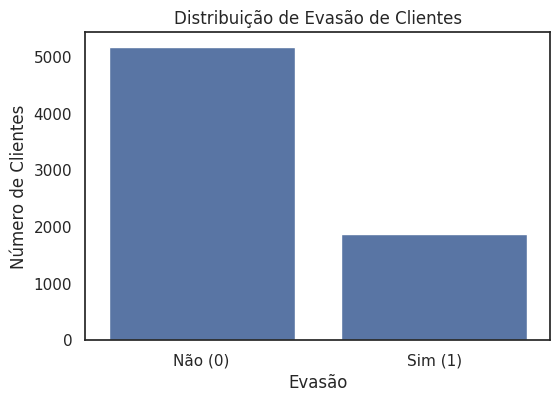

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Evasao', data=df_normalizado)
plt.title('Distribuição de Evasão de Clientes')
plt.xlabel('Evasão')
plt.ylabel('Número de Clientes')
plt.xticks([0,1], ['Não (0)', 'Sim (1)'])
plt.show()

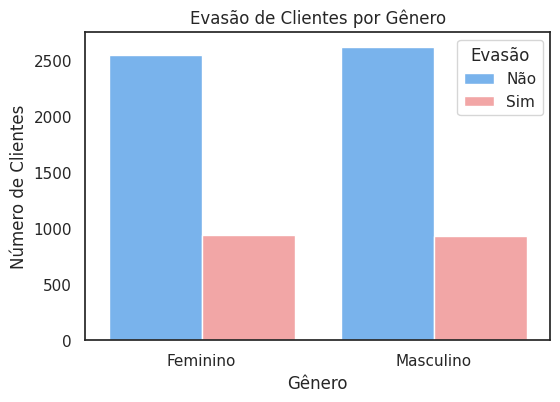

In [189]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_normalizado, x='Genero', hue='Evasao', palette=['#66b3ff', '#ff9999'])
plt.title('Evasão de Clientes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()


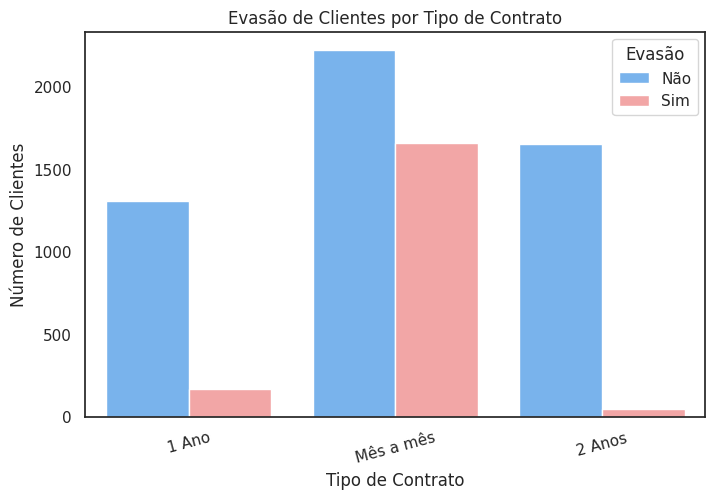

In [190]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_normalizado, x='Tipo_Contrato', hue='Evasao', palette=['#66b3ff', '#ff9999'])
plt.title('Evasão de Clientes por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=15)
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()


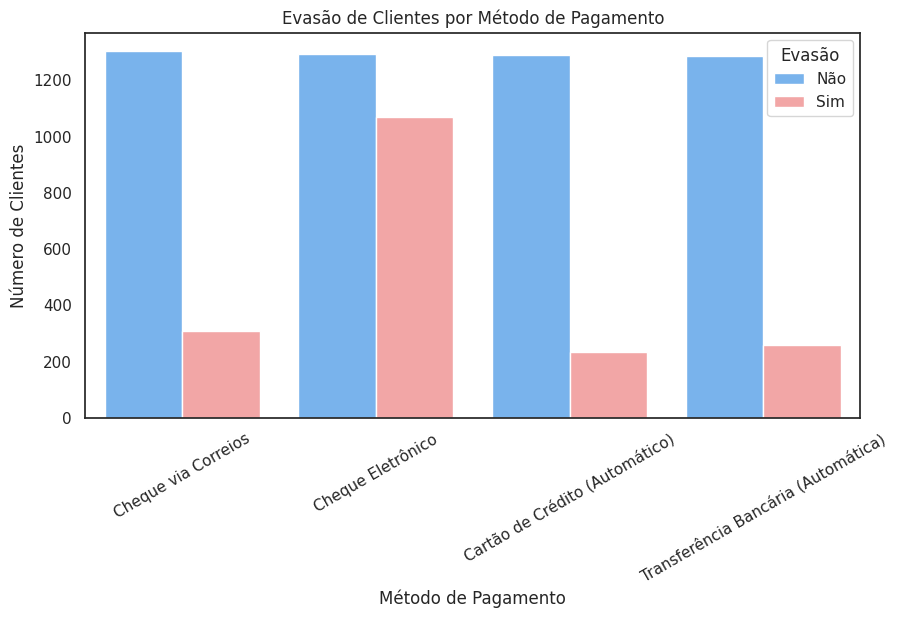

In [191]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_normalizado, x='Metodo_Pagamento', hue='Evasao', palette=['#66b3ff', '#ff9999'])
plt.title('Evasão de Clientes por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=30)
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()


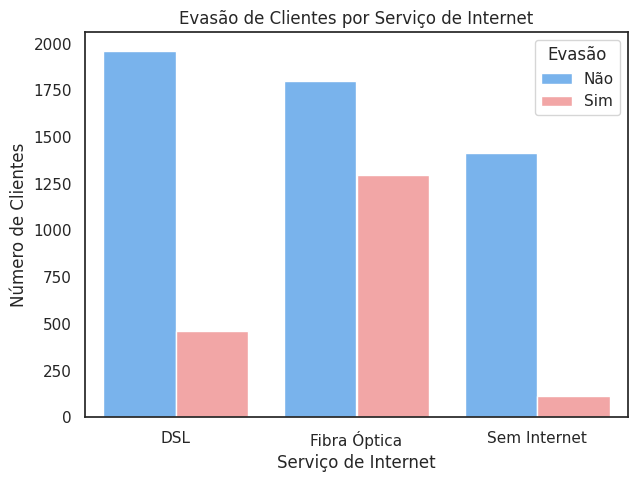

In [192]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_normalizado, x='Servico_Internet', hue='Evasao', palette=['#66b3ff', '#ff9999'])
plt.title('Evasão de Clientes por Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()


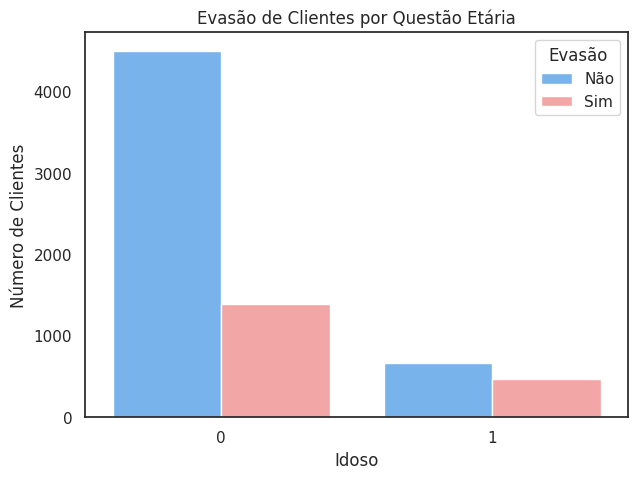

In [193]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_normalizado, x='Idoso', hue='Evasao', palette=['#66b3ff', '#ff9999'])
plt.title('Evasão de Clientes por Questão Etária')
plt.xlabel('Idoso')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()


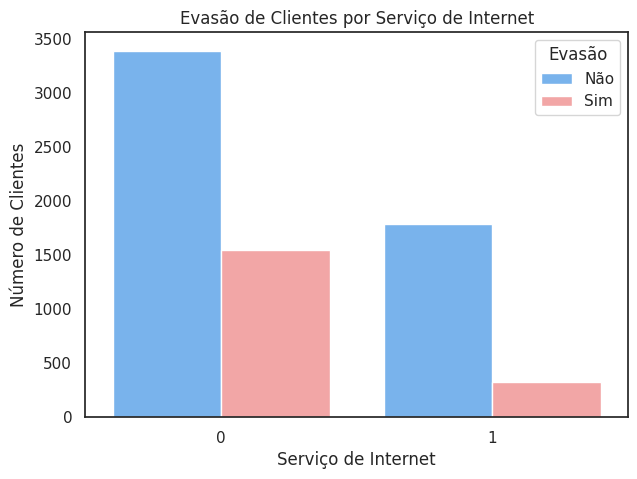

In [194]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_normalizado, x='Tem_Dependentes', hue='Evasao', palette=['#66b3ff', '#ff9999'])
plt.title('Evasão de Clientes por Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()


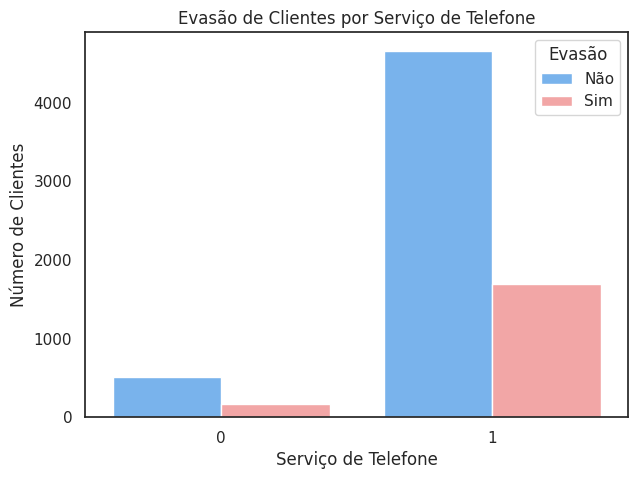

In [195]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_normalizado, x='Servico_Telefone', hue='Evasao', palette=['#66b3ff', '#ff9999'])
plt.title('Evasão de Clientes por Serviço de Telefone')
plt.xlabel('Serviço de Telefone')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()


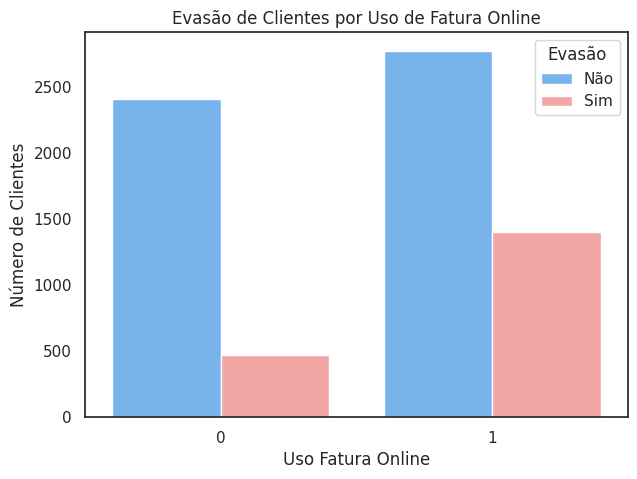

In [196]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_normalizado, x='Fatura_Online', hue='Evasao', palette=['#66b3ff', '#ff9999'])
plt.title('Evasão de Clientes por Uso de Fatura Online')
plt.xlabel('Uso Fatura Online')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()


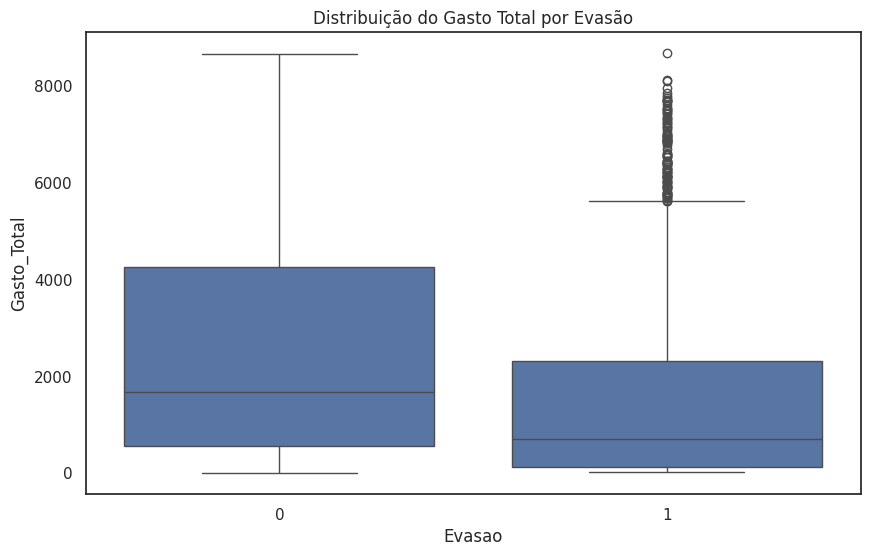

In [197]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Evasao', y='Gasto_Total', data=df_normalizado)
plt.title('Distribuição do Gasto Total por Evasão')
plt.show()


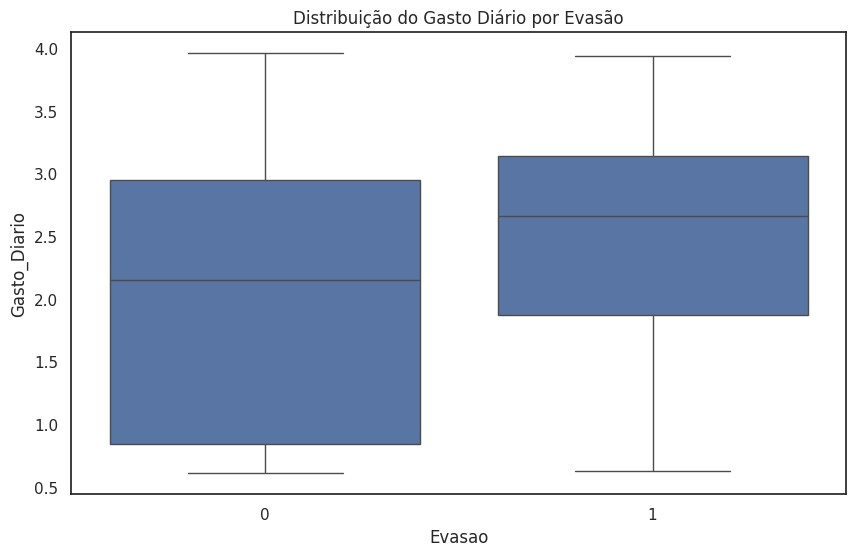

In [198]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Evasao', y='Gasto_Diario', data=df_normalizado)
plt.title('Distribuição do Gasto Diário por Evasão')
plt.show()


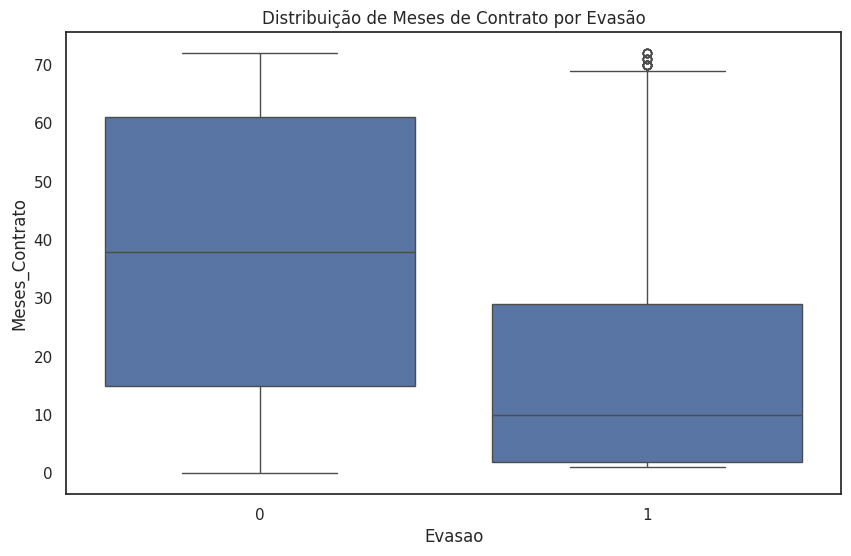

In [199]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_normalizado)
plt.title('Distribuição de Meses de Contrato por Evasão')
plt.show()


In [201]:
correlacoes = df_normalizado.corr(numeric_only=True)
correlacoes['Evasao'].sort_values(ascending=False)


,Evasao
Evasao,1.000000
Gasto_Diario,0.193412
Gasto_Mensal,0.193356
Fatura_Online,0.191825
Idoso,0.150889
Streaming_TV,0.063228
Streaming_Filmes,0.061382
Linhas_Adicionais,0.040102
Servico_Telefone,0.011942
Protecao_Dispositivo,-0.066160


In [202]:
# Criação de Variável para cálculo de quantidade de serviços adicionais contratados
servicos = ['Servico_Telefone', 'Linhas_Adicionais', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']
df_normalizado['Qtd_Servicos'] = df_normalizado[servicos].sum(axis=1)


In [203]:
df_normalizado[['Qtd_Servicos', 'Evasao']].corr()


,Qtd_Servicos,Evasao
Qtd_Servicos,1.000000,-0.067264
Evasao,-0.067264,1.000000


In [204]:
# Proporção de Usuários com suporte Técnico por Evasão
df_normalizado.groupby('Evasao')['Suporte_Tecnico'].value_counts(normalize=True) *100


Evasao  Suporte_Tecnico
0       0                  66.486278
        1                  33.513722
1       0                  83.413590
        1                  16.586410
Name: proportion, dtype: float64

<Axes: xlabel='Gasto_Mensal', ylabel='Count'>

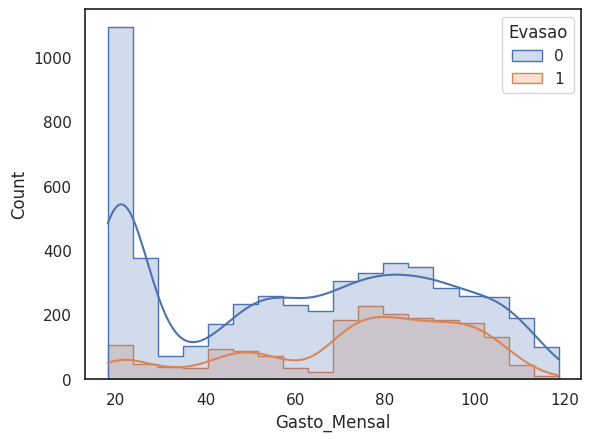

In [205]:
sns.histplot(data=df_normalizado, x='Gasto_Mensal', hue='Evasao', kde=True, element='step')


<Axes: xlabel='Meses_Contrato', ylabel='Count'>

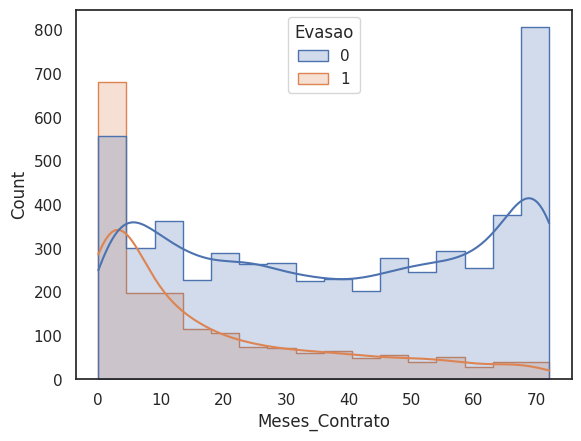

In [206]:
sns.histplot(data=df_normalizado, x='Meses_Contrato', hue='Evasao', kde=True, element='step')


<Axes: xlabel='Tipo_Contrato'>

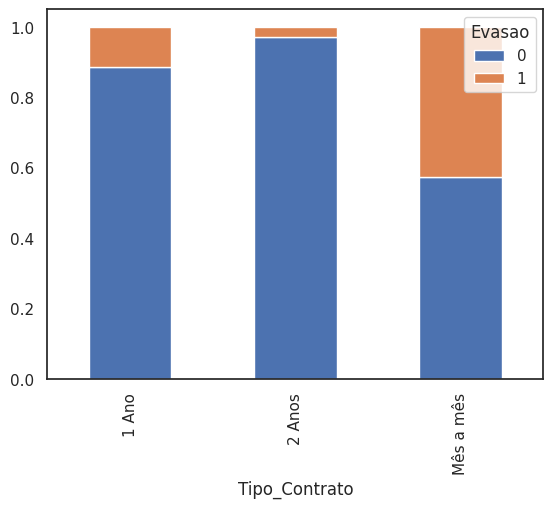

In [207]:
prop = df_normalizado.groupby('Tipo_Contrato')['Evasao'].value_counts(normalize=True).unstack()
prop.plot(kind='bar', stacked=True)


# Relatório Final


---
## Introduçao

A **Telecom X**, empresa do setor de telecomunicações, enfrenta um desafio estratégico: a alta taxa de cancelamento de clientes, também conhecida como churn. Com o aumento da competitividade no mercado e a facilidade de migração entre operadoras, compreender os motivos que levam à evasão tornou-se essencial para a retenção de clientes e a sustentabilidade do negócio.

Neste projeto, conduzi uma análise exploratória de dados (EDA) a partir de uma base contendo informações demográficas, contratuais e de uso dos serviços pelos clientes. O objetivo é identificar padrões de comportamento associados à evasão, oferecendo à equipe de Data Science uma base sólida para o desenvolvimento de modelos preditivos e estratégias de fidelização.

A análise foi realizada com o uso de Python e bibliotecas como Pandas, Matplotlib e Seaborn, contemplando etapas de limpeza, transformação, visualização e extração de insights relevantes sobre o perfil dos clientes e suas decisões de permanência ou saída.

---
## Descrição da Base de Dados

A base de dados utilizada nesta análise contém informações detalhadas sobre 7.043 clientes da Telecom X, abrangendo aspectos demográficos, contratuais e de uso dos serviços. Cada linha representa um cliente único, identificado por um código exclusivo (customerID).

As variáveis estão organizadas em categorias:

*   Dados Pessoais: gender, SeniorCitizen, Partner, Dependents
*   Informações Contratuais: Contract, tenure, PaymentMethod, PaperlessBilling
*   Serviços Contratados: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
*   Faturamento: Charges.Monthly (gasto mensal), Charges.Total (gasto total)
*   Variável Alvo: Churn, que indica se o cliente deixou ou não a empresa


---

## Pré-processamento dos Dados

Antes da análise exploratória, realizamos um conjunto de etapas de limpeza, padronização e transformação da base de dados para garantir consistência e qualidade na análise:

* Identifiquei clientes com valores nulos na coluna `Churn` e os removemos, além de converter a coluna `Charges.Total` para tipo numérico, tratando os erros e preenchendo os nulos com zero.
* Substituí valores como `"No phone service"` e `"No internet service"` por `"No"` em colunas relacionadas, unificando a lógica de resposta.
* Calculei a variável `Gasto_Diario`, dividindo o gasto mensal por 30 e arredondando o valor.
* Variáveis com respostas `"Yes/No"` foram convertidas para `1/0`, facilitando análises estatísticas e correlações.
* Traduzi termos técnicos para o português (ex.: `"Churn"` para `"Evasao"`, `"gender"` para `"Genero"`), mantendo a coerência com o contexto da empresa.
* Atualizei os nomes das variáveis para refletirem melhor seus significados e manterem consistência com o idioma e escopo da análise.





---
## Análise Exploratória dos Dados

### Principais Fatores Categóricos Relacionados à Evasão de Clientes

A análise dos dados categóricos indicou que alguns fatores se destacam na relação com a evasão:

- **Tipo de contrato:** A evasão é muito maior entre clientes com contratos mês a mês, enquanto contratos de 1 ano ou mais apresentam taxas significativamente menores.

- **Método de pagamento:** Clientes que utilizam cheque eletrônico apresentam maior evasão em comparação com outras formas de pagamento.

- **Serviço de internet:** Clientes que possuem serviço de internet, especialmente fibra ótica, têm taxas de evasão mais elevadas do que aqueles com DSL ou sem serviço de internet.

- **Suporte técnico:** A ausência de suporte técnico está associada a uma taxa maior de evasão, sugerindo que esse serviço tem impacto na retenção dos clientes.

- **Fatura online:** Clientes com fatura online tendem a evadir menos do que aqueles que recebem fatura impressa.

- **Idosos, parceiros e dependentes:** Clientes idosos apresentam maior evasão. Além disso, clientes que não têm parceiro ou dependentes tendem a evadir mais.

Essas variáveis categóricas mostram diferenças claras nas taxas de evasão e são importantes para a análise e desenvolvimento de estratégias de retenção.


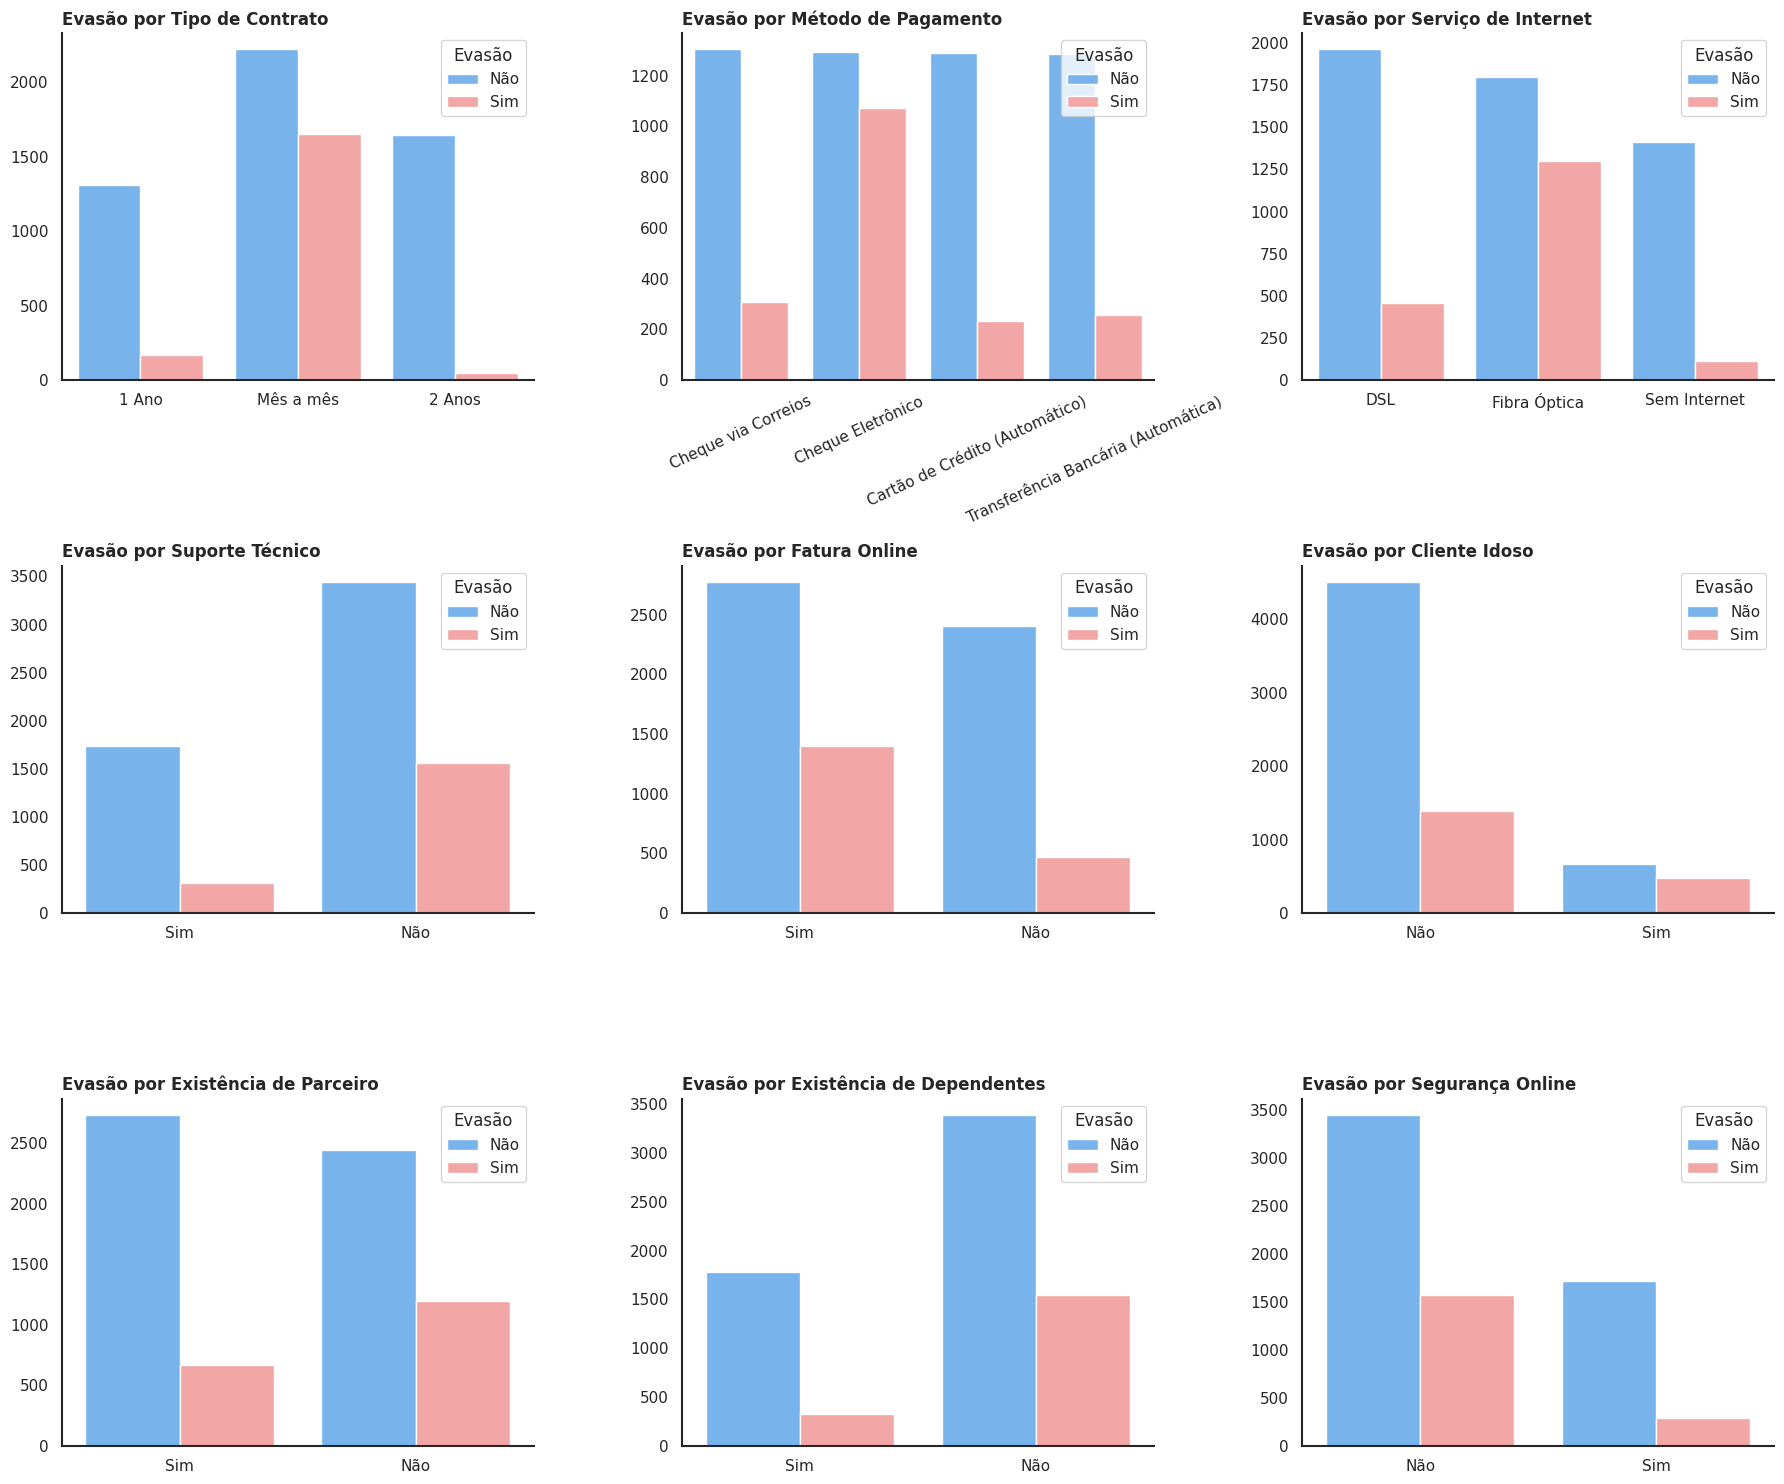

In [208]:
# Cria uma cópia do DataFrame original e converte variáveis binárias de 0/1 para 'Não'/'Sim'
df_plot = df_normalizado.copy()

bin_vars = ['Suporte_Tecnico', 'Fatura_Online', 'Idoso', 'Tem_Parceiro', 'Tem_Dependentes', 'Seguranca_Online']
for var in bin_vars:
    df_plot[var] = df_plot[var].map({0: 'Não', 1: 'Sim'})

# Define estilo e cores para os gráficos
sns.set(style="white")
cores = ['#66b3ff', '#ff9999']  # Azul para 'Não' e vermelho para 'Sim'

# Lista de variáveis categóricas a serem analisadas
variaveis = [
    'Tipo_Contrato',
    'Metodo_Pagamento',
    'Servico_Internet',
    'Suporte_Tecnico',
    'Fatura_Online',
    'Idoso',
    'Tem_Parceiro',
    'Tem_Dependentes',
    'Seguranca_Online'
]

# Títulos correspondentes para os gráficos
titulos = [
    'Tipo de Contrato',
    'Método de Pagamento',
    'Serviço de Internet',
    'Suporte Técnico',
    'Fatura Online',
    'Cliente Idoso',
    'Existência de Parceiro',
    'Existência de Dependentes',
    'Segurança Online'
]

# Cria uma grade de subplots 3x3 para exibir os gráficos
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
axs = axs.flatten()

# Gera um gráfico de contagem para cada variável categórica, separado por evasão
for i, var in enumerate(variaveis):
    sns.countplot(data=df_plot, x=var, hue='Evasao', palette=cores, ax=axs[i])
    axs[i].set_title(f'Evasão por {titulos[i]}', loc='left', fontsize=12, fontweight='bold')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].legend(title='Evasão', labels=['Não', 'Sim'])

    # Exibe e destaca as bordas esquerda e inferior
    for side in ['left', 'bottom']:
        axs[i].spines[side].set_visible(True)
        axs[i].spines[side].set_linewidth(1.5)

    # Oculta as bordas superior e direita
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

    # Remove o grid do fundo
    axs[i].grid(False)

    # Ajusta a rotação dos rótulos do eixo x para evitar sobreposição
    if var == 'Metodo_Pagamento':
        axs[i].tick_params(axis='x', rotation=25)
    else:
        axs[i].tick_params(axis='x', rotation=0)

# Remove subplots vazios, caso existam
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Ajusta o layout final para melhor visualização
plt.tight_layout()
plt.show()



---

## Análise por Variáveis Numéricas

A análise gráfica das variáveis numéricas permitiu identificar padrões relevantes associados à evasão de clientes:

* Clientes que evadem tendem a ter contratos com menor duração. Isso é visível tanto pelo pico no histograma entre 0 e 10 meses quanto pela mediana mais baixa no boxplot. Esse comportamento sugere que a evasão ocorre majoritariamente nos primeiros meses, indicando uma possível **insatisfação inicial** com os serviços.

* A evasão é mais frequente entre clientes que pagam entre **R\$70 e R\$110 por mês**, enquanto os clientes que não evadem mostram um pico de frequência entre **R\$20 e R\$25**. Isso pode indicar uma **percepção negativa de custo-benefício** entre os clientes com maior valor mensal de cobrança.

* A distribuição do gasto total entre clientes que evadem é mais concentrada nas faixas **inferiores a R\$1.000**, refletindo sua permanência curta como clientes. Também se observa uma dispersão menor e presença de outliers acima de R\$5.800, mas em menor quantidade. Os clientes que não evadem têm valores mais variados e medianas mais altas.

* Clientes que evadem apresentam maior concentração com valores entre **R\$2,30 e R\$3,40 por dia**, enquanto os que não evadem estão mais concentrados **abaixo de R\$1,00 por dia**. Assim como o gasto mensal, esse padrão reforça a hipótese de que **valores mais altos podem impulsionar a evasão**.

<ipython-input-209-102e2e0eb721>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-209-102e2e0eb721>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i, 0].set_xticklabels(['Não', 'Sim'])  # Converte 0/1 para rótulos legíveis
<ipython-input-209-102e2e0eb721>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-209-102e2e0eb721>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i, 0].set_xticklabels(['Não', 'Sim'])  # Converte 0/1 para rótulos legíveis
<ipython-input-209-102e2e0eb721>:14:

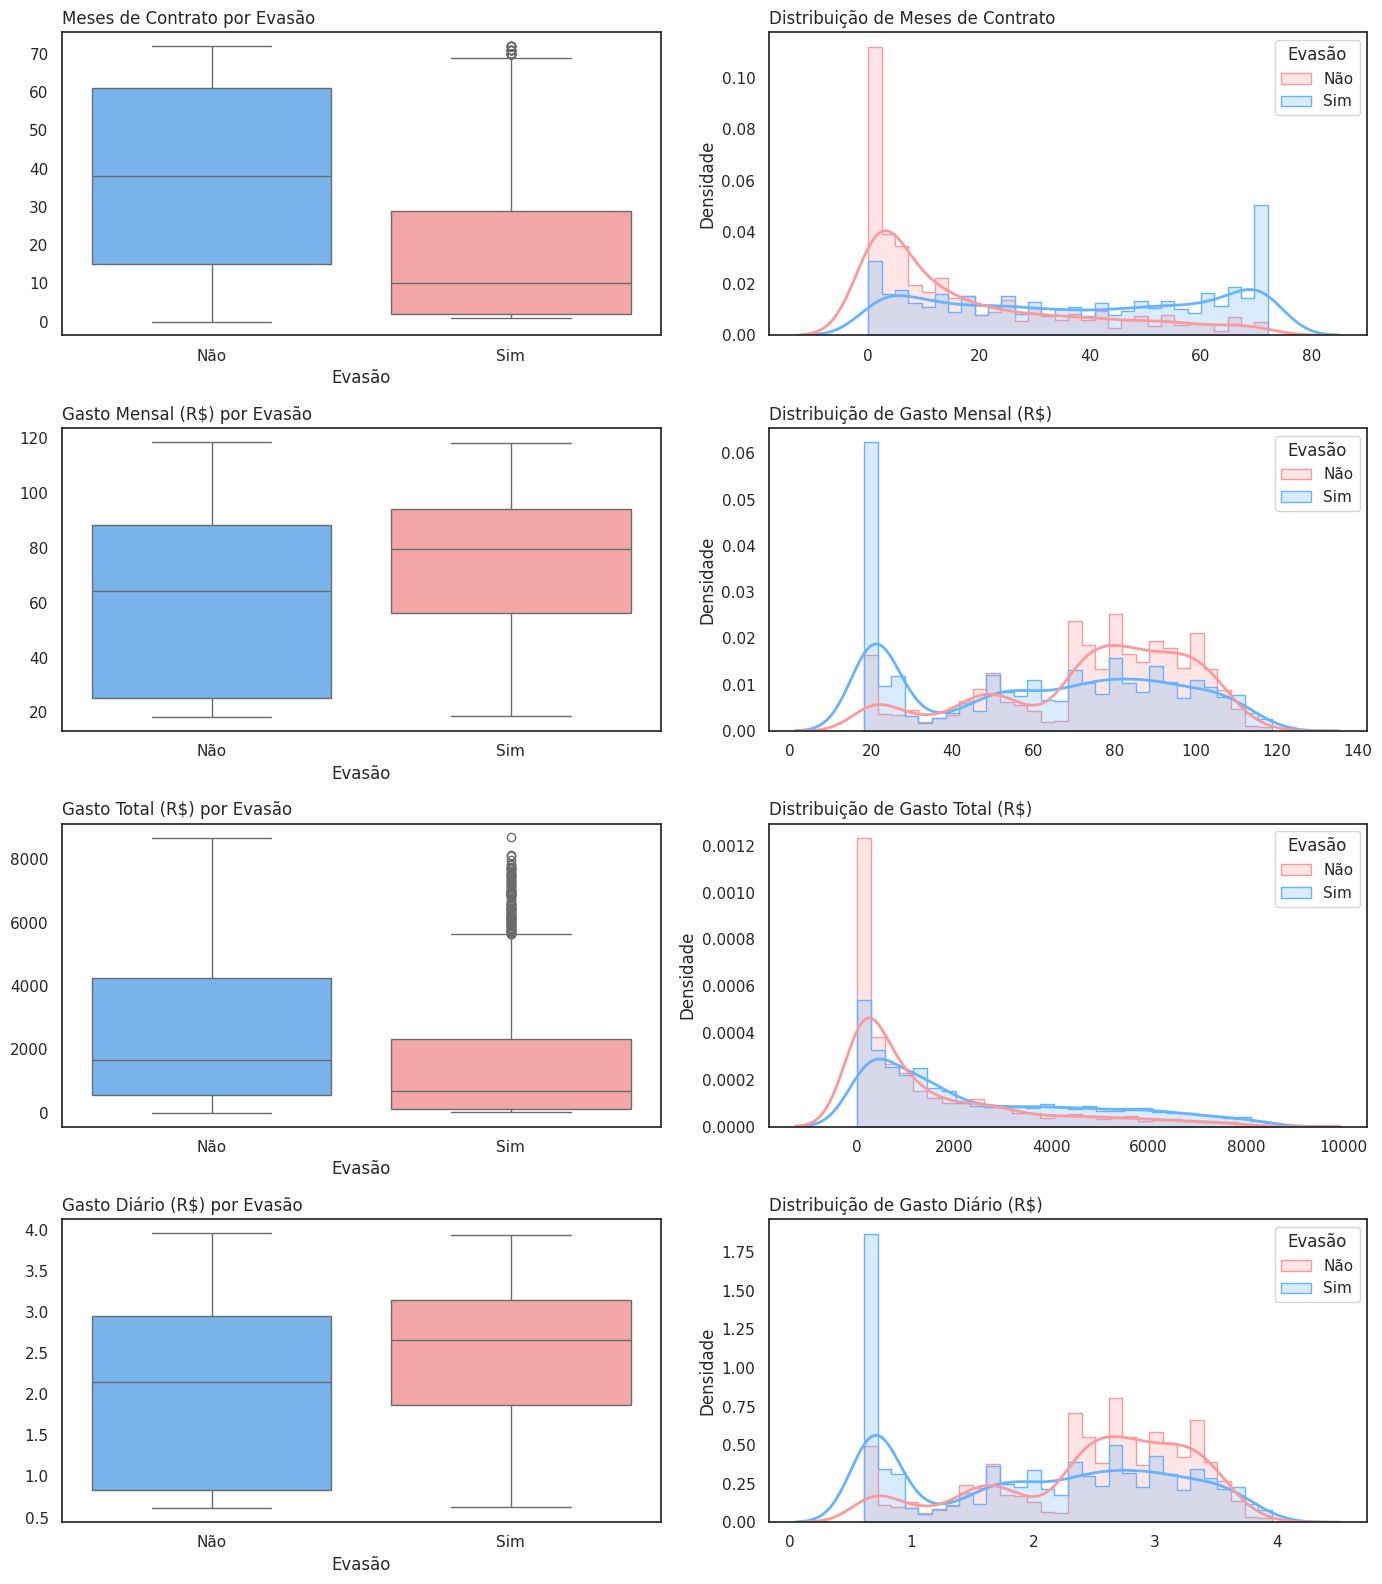

In [209]:
# Define estilo visual do Seaborn
sns.set(style="white")

# Lista de variáveis numéricas e seus respectivos títulos legíveis
variaveis_numericas = ['Meses_Contrato', 'Gasto_Mensal', 'Gasto_Total', 'Gasto_Diario']
titulos = ['Meses de Contrato', 'Gasto Mensal (R$)', 'Gasto Total (R$)', 'Gasto Diário (R$)']

# Cria uma grade de subplots: 1 linha por variável, 2 colunas (boxplot e histograma)
fig, axs = plt.subplots(len(variaveis_numericas), 2, figsize=(14, 16))

# Itera sobre as variáveis numéricas
for i, var in enumerate(variaveis_numericas):
    # ----- Boxplot da variável por evasão -----
    sns.boxplot(
        data=df_normalizado,
        x='Evasao',
        y=var,
        palette=['#66b3ff', '#ff9999'],
        ax=axs[i, 0]
    )
    axs[i, 0].set_title(f'{titulos[i]} por Evasão', loc='left')
    axs[i, 0].set_xlabel('Evasão')
    axs[i, 0].set_ylabel('')
    axs[i, 0].set_xticklabels(['Não', 'Sim'])  # Converte 0/1 para rótulos legíveis
    axs[i, 0].grid(False)

    # ----- Histograma com curva de densidade (KDE) -----
    sns.histplot(
        data=df_normalizado,
        x=var,
        hue='Evasao',
        element='step',
        stat='density',
        common_norm=False,
        palette=['#66b3ff', '#ff9999'],
        ax=axs[i, 1],
        bins=30
    )

    # Adiciona linhas de densidade para cada grupo de evasão
    sns.kdeplot(
        data=df_normalizado[df_normalizado['Evasao'] == 0],
        x=var,
        ax=axs[i, 1],
        color='#66b3ff',
        lw=2
    )
    sns.kdeplot(
        data=df_normalizado[df_normalizado['Evasao'] == 1],
        x=var,
        ax=axs[i, 1],
        color='#ff9999',
        lw=2
    )

    axs[i, 1].set_title(f'Distribuição de {titulos[i]}', loc='left')
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('Densidade')
    axs[i, 1].legend(title='Evasão', labels=['Não', 'Sim'])
    axs[i, 1].grid(False)

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()
plt.show()


---

## Análise de quantidades de serviços contratados por evasão

* A evasão é maior entre quem contrata poucos serviços (principalmente 0, 2 e 3).

* À medida que o número de serviços aumenta, a taxa de evasão diminui significativamente, chegando a valores muito baixos com 7 ou 8 serviços.

Esse padrão indica uma relação inversa entre a quantidade de serviços contratados e a probabilidade de evasão — ou seja, quanto mais serviços o cliente utiliza, menor a chance de cancelar. Isso sugere que a fidelização pode estar associada à diversificação dos serviços

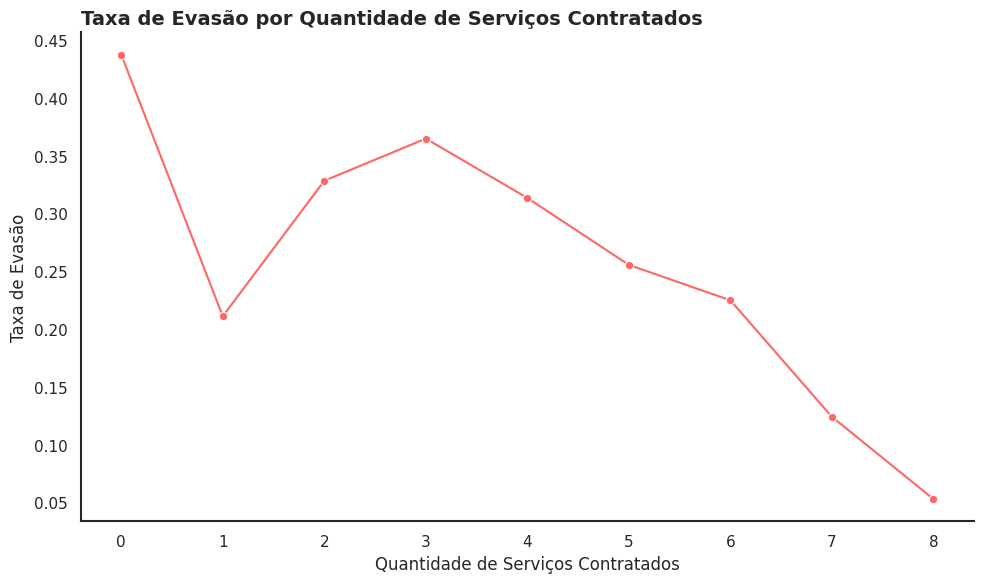

In [210]:
# Calcula a taxa média de evasão para cada quantidade de serviços contratados
evasao_por_servicos = df_normalizado.groupby('Qtd_Servicos')['Evasao'].mean().reset_index()

# Define estilo visual e cor do gráfico
sns.set(style="white")
cor = '#ff6666'  # Cor para a linha do gráfico

# Cria o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=evasao_por_servicos,
    x='Qtd_Servicos',
    y='Evasao',
    marker='o',     # Adiciona marcadores nos pontos
    color=cor       # Aplica a cor definida
)

# Configurações do título e dos rótulos dos eixos
plt.title('Taxa de Evasão por Quantidade de Serviços Contratados', loc='left', fontsize=14, weight='bold')
plt.xlabel('Quantidade de Serviços Contratados')
plt.ylabel('Taxa de Evasão')
plt.xticks(evasao_por_servicos['Qtd_Servicos'])  # Garante que todos os valores únicos de serviços apareçam no eixo X

# Personaliza as bordas do gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)          # Oculta a borda superior
ax.spines['right'].set_visible(False)        # Oculta a borda direita
ax.spines['left'].set_linewidth(1.5)         # Aumenta a espessura da borda esquerda
ax.spines['bottom'].set_linewidth(1.5)       # Aumenta a espessura da borda inferior

# Remove o grid de fundo
plt.grid(False)

# Ajusta o layout final para evitar sobreposição
plt.tight_layout()
plt.show()

---

## Análise de Correlação com Evasão

A matriz de correlação evidencia algumas relações moderadas entre as variáveis numéricas e a evasão:

* Meses de Contrato (-0.35): Apresenta a correlação mais forte com a evasão. Clientes com contratos mais longos tendem significativamente a permanecer, o que sugere que a fidelização cresce com o tempo.

* Gasto Total (-0.20): Quanto maior o valor total investido, menor a taxa de evasão. Clientes com maior histórico de gastos tendem a manter o vínculo com a empresa.

#### Serviços Adicionais:

* Segurança Online (-0.17) e Suporte Técnico (-0.16) mostram correlação negativa com evasão. Isso reforça a hipótese de que a contratação de serviços extras está associada a maior engajamento e permanência.

* A variável Qtd_Servicos também reforça essa conclusão: clientes com mais serviços apresentam menor evasão.

#### Perfil Demográfico:

* Ser idoso (0.15) está levemente associado a maior evasão, indicando a necessidade de estratégias específicas para esse público.

* Ter parceiro (-0.15) ou dependentes (-0.16) também se relaciona a menor evasão, sugerindo que laços familiares podem influenciar na permanência.

#### Comportamento Financeiro:

* Gasto Diário (0.19) e Gasto Mensal (0.19) apresentam leve correlação positiva com evasão — possivelmente indicando que gastos elevados no curto prazo sem percepção de valor podem incentivar o cancelamento.

* Fatura Online (0.19) também mostra leve correlação com evasão, o que pode refletir uma maior taxa de evasão entre clientes mais digitais/autônomos.

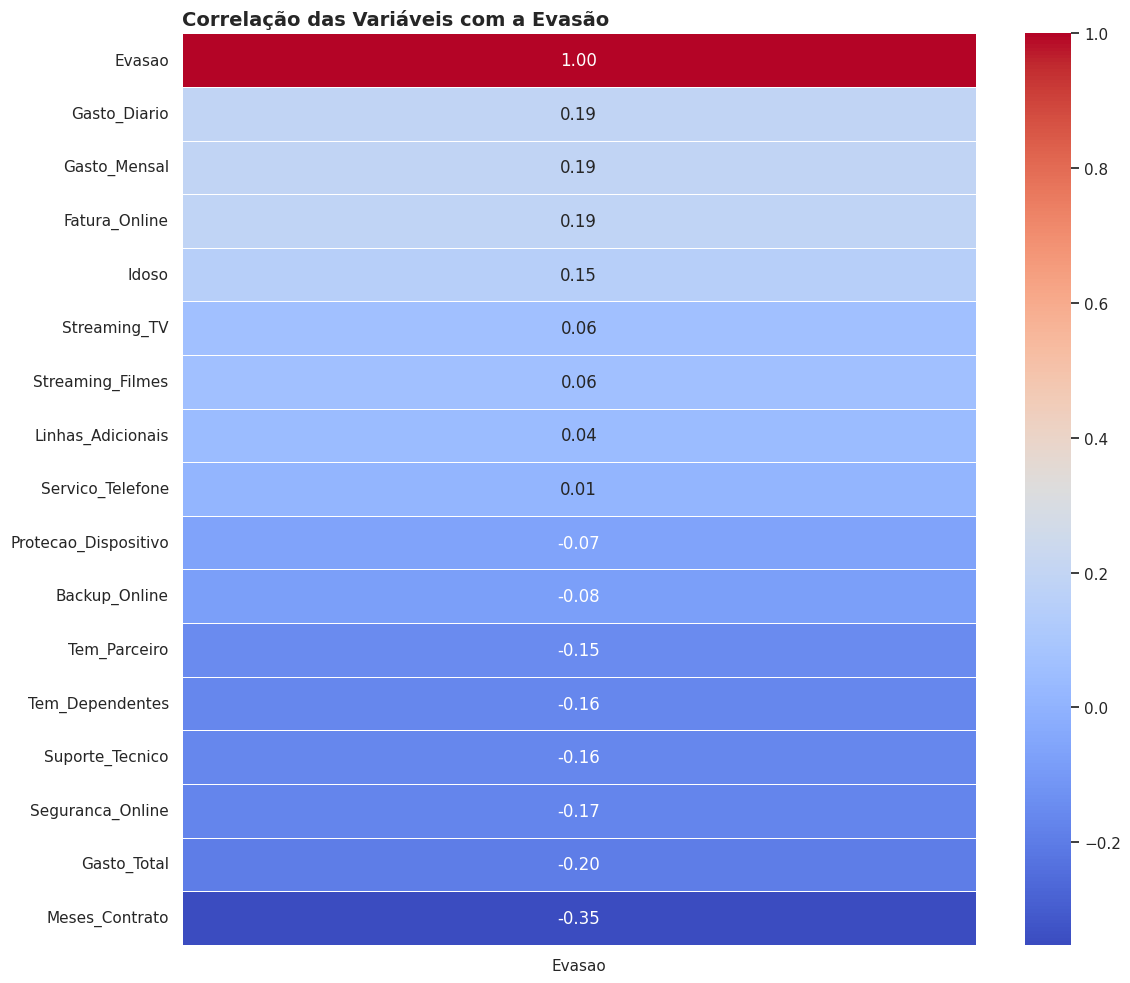

In [211]:
# Cria um heatmap destacando a correlação de cada variável com a variável "Evasao"
plt.figure(figsize=(12, 10))

sns.heatmap(
    correlacoes[['Evasao']].sort_values(by='Evasao', ascending=False),  # Ordena pela correlação com 'Evasao'
    annot=True,              # Exibe os valores numéricos nas células
    cmap='coolwarm',         # Paleta de cores para indicar intensidade da correlação
    fmt=".2f",               # Formato com 2 casas decimais
    linewidths=0.5,          # Espessura das linhas divisórias
    cbar=True                # Exibe a barra de cores
)

# Define o título do gráfico e ajustes visuais
plt.title('Correlação das Variáveis com a Evasão', fontsize=14, fontweight='bold', loc='left')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


---
## Conclusão

A evasão de clientes está fortemente associada a padrões específicos de **tempo de contrato, perfil de uso, tipo de serviço e características demográficas**.

A maioria das evasões ocorre nos primeiros meses de contrato, especialmente entre clientes que contratam poucos serviços, possuem maior gasto mensal e utilizam contratos de curta duração. Há também sinais de que certos perfis demográficos — como clientes idosos ou sem vínculos familiares — estão mais propensos a cancelar.

Além disso, a evasão está inversamente relacionada à diversificação dos serviços utilizados. Clientes com um portfólio mais amplo de serviços apresentam maior permanência, o que indica que o engajamento com diferentes soluções da empresa contribui para a fidelização.

A análise de correlação reforça essas conclusões, destacando a importância do tempo de contrato, do valor total investido e do uso de serviços adicionais como fatores protetores contra a evasão.



---

## Recomendações Estratégicas

### 1.  Redesenho de Jornada Inicial (Onboarding)
- Foco nos **primeiros meses do cliente**, período mais crítico para evasão.
- Implementar boas práticas de **boas-vindas, tutoriais e contato proativo** nos primeiros 90 dias.
- Monitorar a satisfação inicial e oferecer suporte personalizado.

### 2.  Incentivo à Diversificação de Serviços
- Criar **combos e pacotes promocionais** para estimular a contratação de múltiplos serviços.
- Usar algoritmos de **recomendação personalizada** para sugerir serviços adicionais relevantes.
- Recompensar clientes que contratam múltiplos serviços com benefícios exclusivos.

### 3.  Estímulo a Planos de Longa Duração
- Promover **vantagens financeiras** para contratos anuais ou bianuais.
- Facilitar a migração de contratos mensais para contratos mais longos com **descontos ou bônus progressivos**.
- Utilizar campanhas direcionadas para clientes com maior risco de evasão.

### 4.  Atenção a Perfis com Maior Risco
- Desenvolver ações específicas para:
  - **Clientes idosos**, que apresentam evasão ligeiramente maior.
  - **Clientes sem parceiros ou dependentes**, que demonstram menor fidelização.
- Criar campanhas de **relacionamento e inclusão digital** para públicos com menor engajamento.

### 5.  Otimização do Método de Pagamento
- Reavaliar o uso de **cheque eletrônico**, que tem maior taxa de evasão.
- Estimular métodos de pagamento mais seguros e automáticos, como:
  - **Cartão de crédito**
  - **Débito automático**
- Promover **benefícios exclusivos** para quem adotar métodos de menor evasão.

### 6.  Suporte Técnico como Ferramenta de Retenção
- Ampliar a oferta e a visibilidade do **suporte técnico**.
- Usar o suporte como canal de escuta ativa e prevenção de cancelamentos.
- Associar o suporte a **pacotes de fidelização**.